# TERM PROJECT
>**<p style="font-size:20px">INDEX</p><br>**
    >   1. Dataset<br>
    >   2. Object & Purpose<br>
    >   3. Schedule<br>
    >   4. Description<br>

***
***

## 1. DataSet
**[E-commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

>*This is the data of Product Shipment Tracking
>*The data set has 12 atrributes and 10999 data 
    
**Dataset Attributes**

1. **ID**: ID Number of Customers.
2. **Warehouse block**: The Company have big Warehouse which is divided in to block such as A, B, C, D, F.
3. **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
4. **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
5. **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. **Cost of the product**: Cost of the Product in US Dollars.
7. **Prior purchases**: The Number of Prior Purchase.
8. **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
9. **Gender**: Male and Female.
10. **Discount offered**: Discount offered on that specific product.
11. **Weight in gms**: It is the weight in grams.
12. **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
***

## 2. Object & Purpose

**Reached.on.Time_Y.N**
    
    The target is “Reached.on.Time_Y.N”. Reached.on.Time_Y.N represents 1 if the product was reached on time, and 0 if it was not reached on time. Other features allow us to predict whether a product will reach on time. If it is predicted that it cannot be reached on time, it can guide customers again, which will help the business.
***

## 3. Schedule
This project would get **every MONDAY 20:00**<br>
***

## 4. Description
1. import libraries and data-set
2. check missing value & describe data
3. change categorical value (LabelEncoder)
4. show statistical chart
5. scaling

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna import Trial
import time
import copy

In [74]:
data = pd.read_csv("ecommerce_shipping.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [75]:
data.shape

(10999, 12)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [77]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [78]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

no need to treat null value(there isn't null value)

### Target, NonTarget Define

In [79]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0, 1] # range of target
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

### Make histogram 

In [80]:
# def : make histogram number of feature value according to each categorical target feature
# input : target feature, features without target, target range, whole dataframe
def makehist_countft_bytg(tg_name,ft_name,tg_range,data):
    fig, axes = plt.subplots(1, len(tg_range),sharex = True, sharey = True, figsize=(22,5)) #make fig    
    fig.suptitle(ft_name)
    axes_cnt = 0
    for i in tg_range:
        data_per_target = data[data[tg_name] == i]
        data_per_target = data_per_target[ft_name] 
        axes[axes_cnt].hist(data_per_target, bins = 10)
        axes[axes_cnt].grid(True)
        axes[axes_cnt].set_title(tg_name +" = " + str(i))
        axes_cnt = axes_cnt + 1
    plt.show()

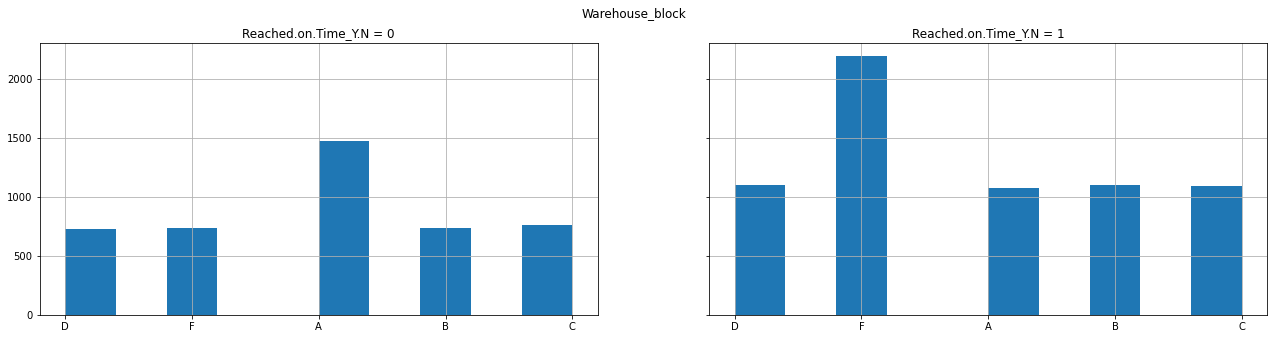

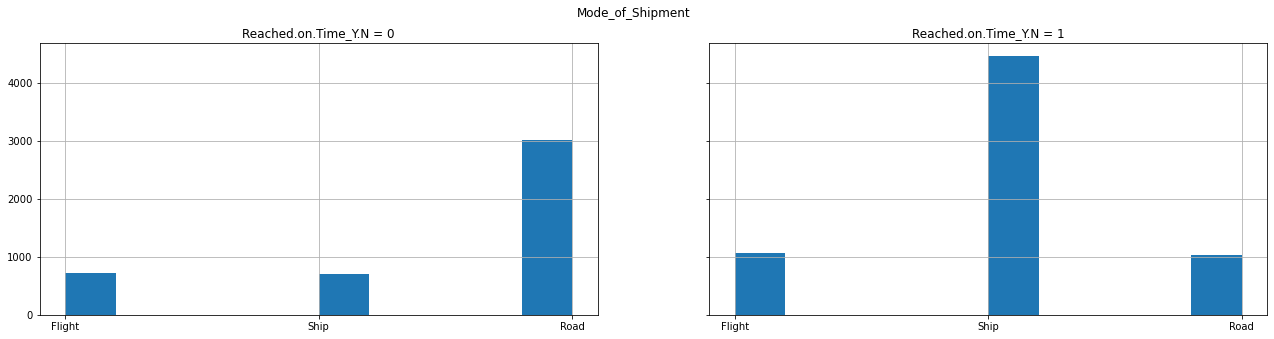

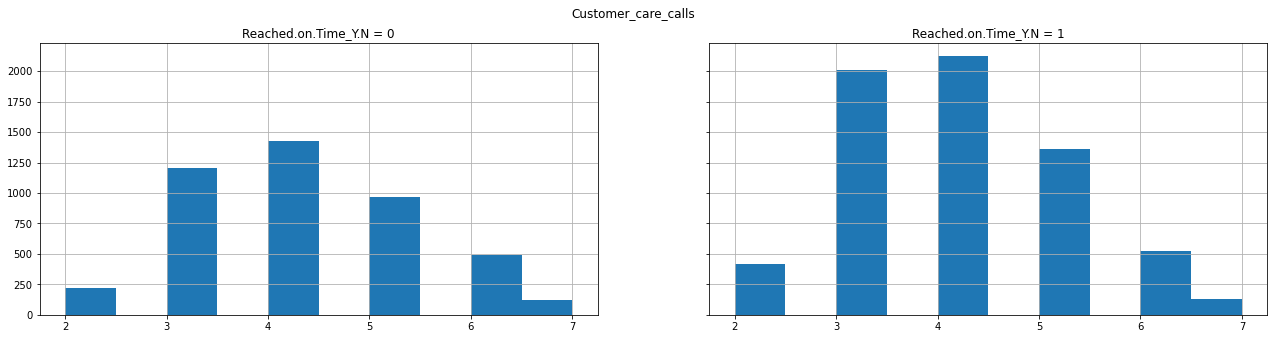

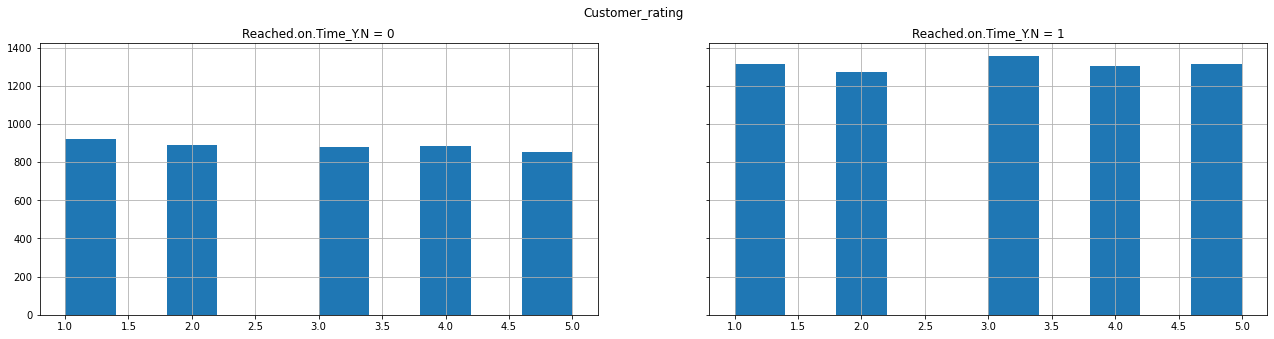

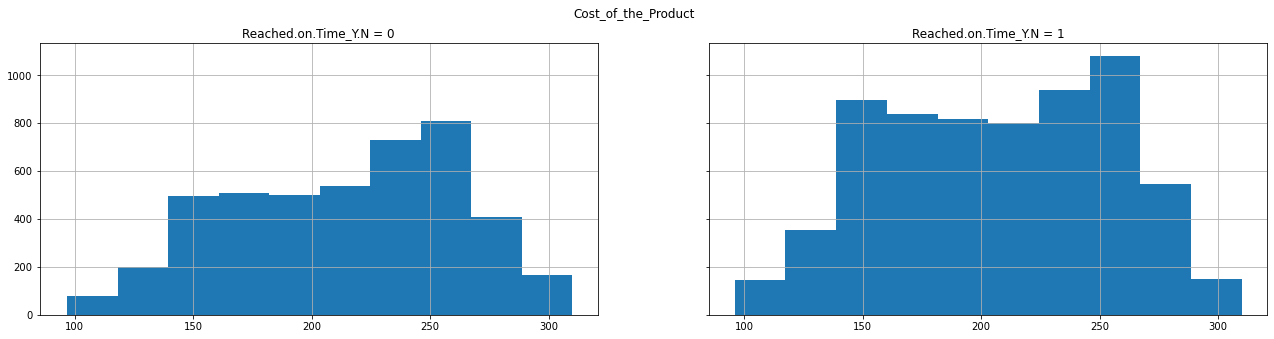

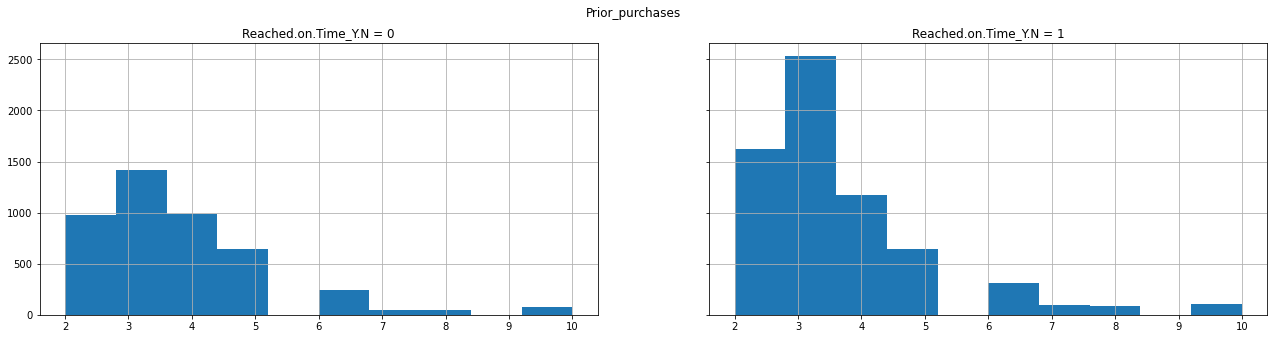

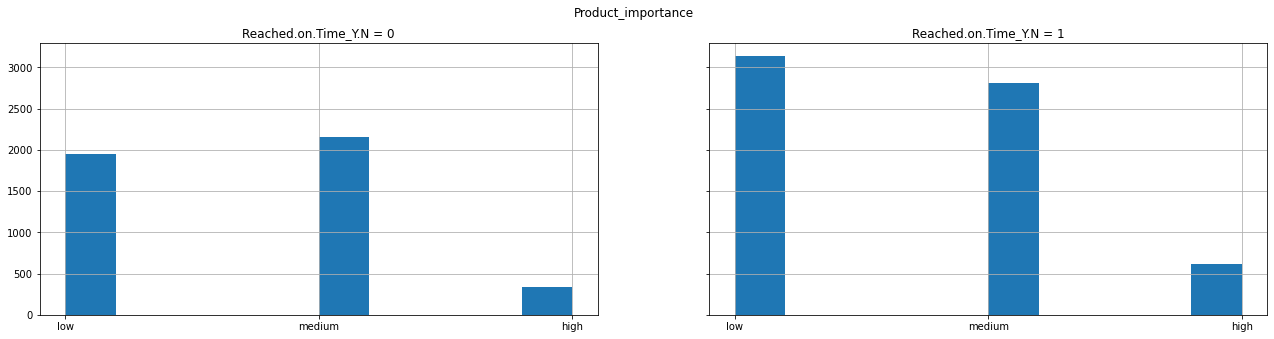

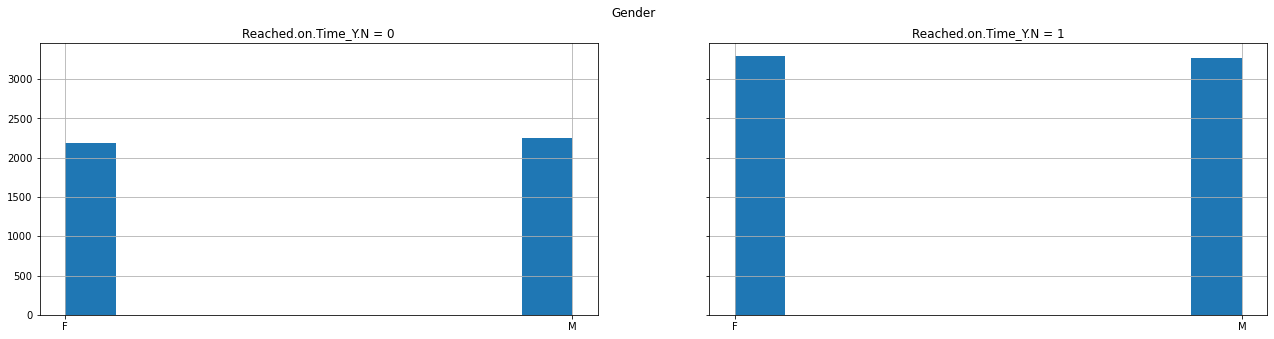

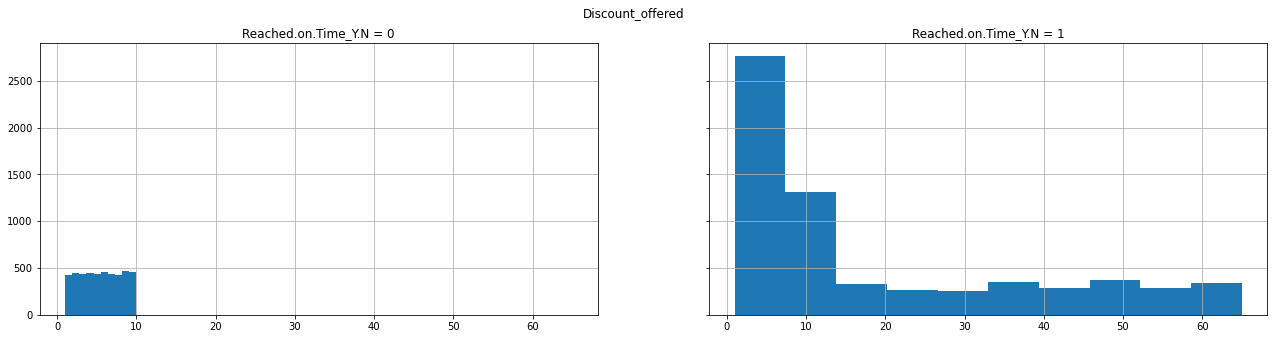

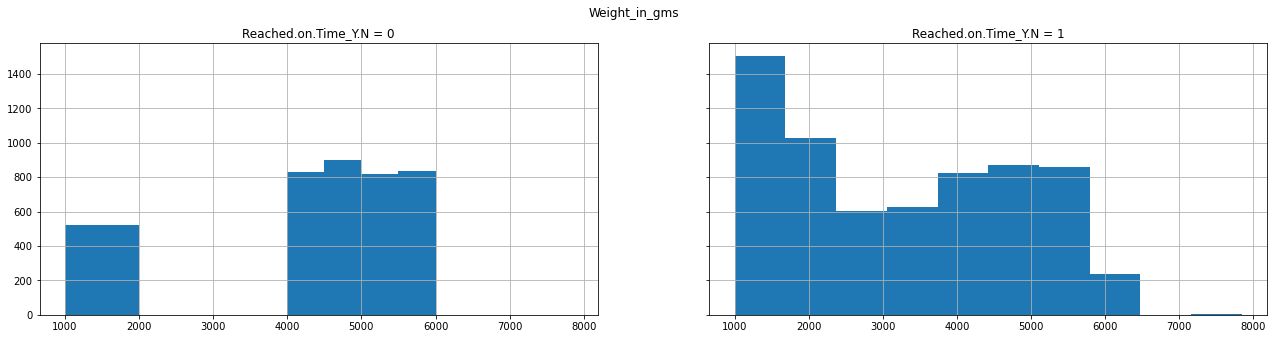

In [81]:
for i in other_feature:
    makehist_countft_bytg(target_feature,i,target_range,data)

### Correlation

<AxesSubplot:>

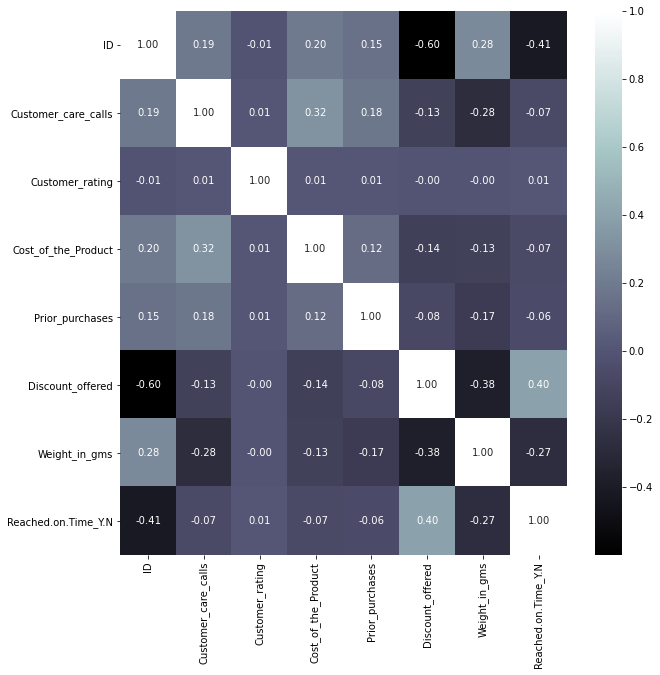

In [82]:
# heatmap corrleation
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'bone')

### Change Categorical data

In [83]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


### Scaling def

In [84]:
# drop target feature
y = data[target_feature]
X = data.drop(target_feature, axis=1)

# test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
9957,9958,1,2,7,4,282,4,1,1,6,1800
1507,1508,4,0,4,1,135,2,2,0,64,1471
6382,6383,2,2,4,1,214,2,1,0,10,4447
1559,1560,4,2,3,1,171,2,1,1,1,1629
5703,5704,1,2,5,5,248,2,1,1,4,5587
...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,2,1,3,5,275,2,1,0,7,4619
5191,5192,4,1,5,5,187,4,2,0,9,5326
5390,5391,0,2,4,2,137,2,2,0,2,5804
860,861,0,2,5,3,144,6,2,0,35,1009


In [85]:
def Scaling(X_train, X_test, scaler):
    scaled_train = pd.DataFrame(scaler.fit_transform(X_train))
    scaled_test = pd.DataFrame(scaler.fit_transform(X_test))
    return scaled_train, scaled_test

In [131]:
def Classifier(X, y, model):
    return_res=[]
    
    index = 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for i in scalers:
        X_train, X_test = Scaling(X_train, X_test, i)
        

        param = range(2, 12)
        for p in param:
            result = []
            t = time.time()

            if model.find("KNeighbor")!=-1 and p%2==1:
                m = KNeighborsClassifier(n_neighbors=p)
            elif model.find("Tree")!=-1:
                if model.find("gini")!=-1:
                    m = DecisionTreeClassifier(criterion = 'gini', max_depth = p)
                elif model.find("entropy")!=-1:
                    m = DecisionTreeClassifier(criterion = 'entropy', max_depth = p)
                
            else:
                continue
            
            result.append(model)
            result.append(i)                
            result.append(p)
            
            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            runtime = time.time() - t
            
            result.append(score)
            result.append(runtime)

            return_res.append(result)
            
    return return_res

In [133]:
from sklearn.metrics import r2_score
def Regression(X, y, name):
    return_res=[]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for i in scalers:
        result = []
        t = time.time()
        
        X_train, X_test = Scaling(X_train, X_test, i)

        if name == 'polynomialRegression':
            poly = PolynomialFeatures(degree = 2, include_bias = True)
            X_train_ = poly.fit_transform(X_train)
            X_test_ = poly.fit_transform(X_test)
            
        else : #multiple regression -> do nothing
            X_train_ = X_train
            X_test_ = X_test
            
        result.append(name)
        result.append(i)
        result.append(['no Param'])
        model = LinearRegression()
        model.fit(X_train_,y_train)
        y_predict = model.predict(X_test_)
        score = r2_score(y_test, y_predict)
        runtime = time.time() - t   
        result.append(score)
        result.append(runtime)
        return_res.append(result)
            
    return return_res

In [90]:
def best5(df):
    df.sort_values(by=['score'], ascending=False, inplace=True)
    return df[:5]

In [134]:
# main code
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
regression_name = ['polynomialRegression', 'multipleRegression']
classification_name = ['DecisionTree(gini)', 'DecisionTree(entropy)', 'KNeighborsClassifier']

y = data[target_feature]
X = data.drop(target_feature, axis=1)
result_regression = []
result_classification = []
result = []

for model in regression_name:
    result_regression.append(Regression(X, y, model))
result_regression = sum(result_regression, [])


for model in classification_name:
    result_classification.append(Classifier(X, y, model))
result_classification = sum(result_classification, [])


final_list = result_classification+result_regression
final_result = pd.DataFrame(final_list, columns=
                     ['Model', 'Scaler', 'Parameter_list', 'score', 'runtime'])


final_result

,Model,Scaler,Parameter_list,score,runtime
0,DecisionTree(gini),StandardScaler(),2,6.833333e-01,0.007546
1,DecisionTree(gini),StandardScaler(),3,6.833333e-01,0.009051
2,DecisionTree(gini),StandardScaler(),4,6.730303e-01,0.010569
3,DecisionTree(gini),StandardScaler(),5,6.748485e-01,0.012919
4,DecisionTree(gini),StandardScaler(),6,6.709091e-01,0.014629
...,...,...,...,...,...
76,polynomialRegression,MinMaxScaler(),[no Param],2.339554e-01,0.024698
77,polynomialRegression,RobustScaler(),[no Param],-4.851554e+19,0.035812
78,multipleRegression,StandardScaler(),[no Param],2.133150e-01,0.009056
79,multipleRegression,MinMaxScaler(),[no Param],2.133965e-01,0.010070


In [135]:
best5(final_result)

,Model,Scaler,Parameter_list,score,runtime
40,DecisionTree(entropy),MinMaxScaler(),2,0.687879,0.009002
10,DecisionTree(gini),MinMaxScaler(),2,0.687879,0.007066
41,DecisionTree(entropy),MinMaxScaler(),3,0.687879,0.011455
11,DecisionTree(gini),MinMaxScaler(),3,0.687879,0.009084
1,DecisionTree(gini),StandardScaler(),3,0.683333,0.009051
